<a href="https://colab.research.google.com/github/ilhamsetyabudi/project_1_1_2_Man_-_Female_Classification/blob/main/project_1_1_2_Man_%26_Female_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA PREPARATION & PROCESSING **

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install rarfile

In [3]:
import pandas as pd
from google.colab import files
import rarfile
import os
import shutil
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torchvision
from torchvision.datasets import ImageFolder
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import models, transforms, datasets
from sklearn.metrics import confusion_matrix

MENGIMPOR DAN MENYEDERHANAKAN FILE list_attribute.csv

In [4]:
'''
# Mengimpor file CSV ke dataframe dengan pemisah titik koma (;) dan menangani baris yang tidak sesuai format
dflist_attribute = pd.read_csv('list_attribute.csv', delimiter=';', error_bad_lines=False)
'''

"\n# Mengimpor file CSV ke dataframe dengan pemisah titik koma (;) dan menangani baris yang tidak sesuai format\ndflist_attribute = pd.read_csv('list_attribute.csv', delimiter=';', error_bad_lines=False)\n"

In [5]:
'''
dflist_attribute.info()
'''

'\ndflist_attribute.info()\n'

In [6]:
'''
dfGender = dflist_attribute[['imageId', 'Male']]
'''

"\ndfGender = dflist_attribute[['imageId', 'Male']]\n"

In [7]:
'''
dfGender
'''

'\ndfGender\n'

In [8]:
'''
dfGender['Male'] = dfGender['Male'].apply(lambda x: 1 if x > 0 else 0).astype(int)
'''

"\ndfGender['Male'] = dfGender['Male'].apply(lambda x: 1 if x > 0 else 0).astype(int)\n"

In [9]:
'''
dfGender
'''

'\ndfGender\n'

In [10]:
'''
dfGender.to_csv('dfGender.csv', index=False)
files.download('dfGender.csv')
'''

"\ndfGender.to_csv('dfGender.csv', index=False)\nfiles.download('dfGender.csv')\n"

EXTRACT DATA IMAGE YANG BERADA DI DRIVE

In [11]:
# Membuka file RAR
with rarfile.RarFile('drive/MyDrive/Images.rar', 'r') as rf:
    # Ekstrak isi file RAR ke direktori tujuan
    rf.extractall('sample_data')

In [12]:
folder_path = 'sample_data/Images'  # Ganti dengan path folder "Images" Anda

# Menghitung jumlah foto di folder
count = 0
for filename in os.listdir(folder_path):
    if filename.endswith('.jpg'):
        count += 1

print(f"Jumlah foto di folder: {count}")

Jumlah foto di folder: 5000


MEMBUAT dfGenderFix DARI dfGender UNTUK MENDROP ROW YANG TIDAK DIPAKAI/TIDAK ADA FOTONYA

In [13]:
'''
# Path folder Images
images_folder = 'sample_data/Images'

# Membuat daftar file gambar yang ada di folder Images
existing_images = [filename for filename in os.listdir(images_folder) if filename.endswith('.jpg')]

# Membuat salinan dataframe dfGender
dfGenderFix = dfGender.copy()

# Menghapus baris yang tidak cocok dengan kondisi
dfGenderFix = dfGenderFix[dfGenderFix['imageId'].isin(existing_images)].dropna()

# Menampilkan dataframe dfGenderFix
dfGenderFix
'''

"\n# Path folder Images\nimages_folder = 'sample_data/Images'\n\n# Membuat daftar file gambar yang ada di folder Images\nexisting_images = [filename for filename in os.listdir(images_folder) if filename.endswith('.jpg')]\n\n# Membuat salinan dataframe dfGender\ndfGenderFix = dfGender.copy()\n\n# Menghapus baris yang tidak cocok dengan kondisi\ndfGenderFix = dfGenderFix[dfGenderFix['imageId'].isin(existing_images)].dropna()\n\n# Menampilkan dataframe dfGenderFix\ndfGenderFix\n"

In [14]:
'''duplicated = dfGenderFix['imageId'].duplicated()
print(duplicated)
total_duplicates = duplicated.sum()
print("Total duplikat dalam kolom 'imageId':", total_duplicates)
'''

'duplicated = dfGenderFix[\'imageId\'].duplicated()\nprint(duplicated)\ntotal_duplicates = duplicated.sum()\nprint("Total duplikat dalam kolom \'imageId\':", total_duplicates)\n'

In [15]:
'''
duplicated = dfGenderFix['imageId'].duplicated(keep=False)
duplicated_data = dfGenderFix[duplicated]
print(duplicated_data)
'''

"\nduplicated = dfGenderFix['imageId'].duplicated(keep=False)\nduplicated_data = dfGenderFix[duplicated]\nprint(duplicated_data)\n"

In [16]:
'''
dfGenderFix.to_csv('dfGenderBelumFix.csv', index=False)
files.download('dfGenderBelumFix.csv')
'''

"\ndfGenderFix.to_csv('dfGenderBelumFix.csv', index=False)\nfiles.download('dfGenderBelumFix.csv')\n"

In [17]:
'''
dfGenderFix.drop_duplicates(subset='imageId', keep='first', inplace=True)
dfGenderFix
'''

"\ndfGenderFix.drop_duplicates(subset='imageId', keep='first', inplace=True)\ndfGenderFix\n"

In [18]:
'''
dfGenderFix.to_csv('dfGenderFix.csv', index=False)
files.download('dfGenderFix.csv')
'''

"\ndfGenderFix.to_csv('dfGenderFix.csv', index=False)\nfiles.download('dfGenderFix.csv')\n"

In [19]:
dfGenderFix = pd.read_csv('dfGenderFix.csv')
dfGenderFix

,imageId,Male
0,000051.jpg,1
1,000052.jpg,1
2,000065.jpg,1
3,000166.jpg,1
4,000198.jpg,0
...,...,...
4995,202320.jpg,0
4996,202340.jpg,0
4997,202347.jpg,0
4998,202357.jpg,0


In [20]:
male_count = dfGenderFix['Male'].value_counts()[1]
female_count = dfGenderFix['Male'].value_counts()[0]

print("Jumlah nilai Male = 1:", male_count)
print("Jumlah nilai Male = 0:", female_count)

Jumlah nilai Male = 1: 2047
Jumlah nilai Male = 0: 2953


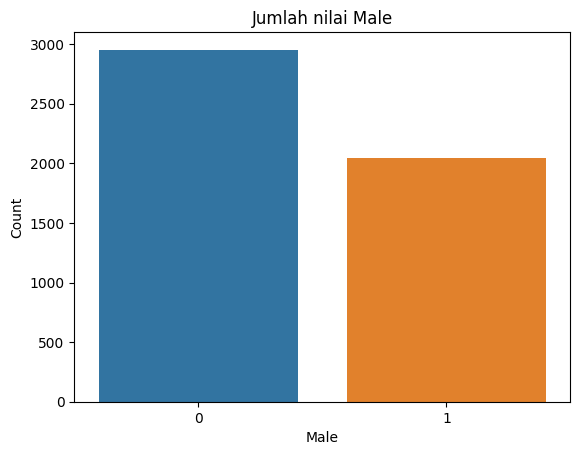

In [21]:

# Plot jumlah nilai 1 dan 0 di kolom 'Male'
sns.countplot(x='Male', data=dfGenderFix)

# Atur label sumbu x
plt.xlabel('Male')

# Atur label sumbu y
plt.ylabel('Count')

# Atur judul plot
plt.title('Jumlah nilai Male')

# Tampilkan plot
plt.show()


SPLIT DATA dfGenderFix ,dan menambah kolom baru untuk menginisialkan yang mana data  train dan test

In [22]:
# Pisahkan fitur (X) dan label (y)
X = dfGenderFix.drop(['imageId', 'Male'], axis=1)
y = dfGenderFix['Male']

# Bagi data menjadi set pelatihan dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Tambahkan kolom baru untuk menandai set pelatihan atau uji
dfGenderFix['Set'] = np.nan
dfGenderFix.loc[X_train.index, 'Set'] = 1
dfGenderFix.loc[X_test.index, 'Set'] = 0

# Konversi tipe data kolom 'Set' menjadi integer
dfGenderFix['Set'] = dfGenderFix['Set'].astype(int)

In [23]:
dfGenderFix

,imageId,Male,Set
0,000051.jpg,1,0
1,000052.jpg,1,1
2,000065.jpg,1,1
3,000166.jpg,1,1
4,000198.jpg,0,1
...,...,...,...
4995,202320.jpg,0,0
4996,202340.jpg,0,0
4997,202347.jpg,0,1
4998,202357.jpg,0,0


In [24]:
# Menghitung jumlah nilai 1 di kolom 'Set' dan nilai 1 di kolom 'Male'
count_1_1 = len(dfGenderFix[(dfGenderFix['Set'] == 1) & (dfGenderFix['Male'] == 1)])

# Menghitung jumlah nilai 1 di kolom 'Set' dan nilai 0 di kolom 'Male'
count_1_0 = len(dfGenderFix[(dfGenderFix['Set'] == 1) & (dfGenderFix['Male'] == 0)])

print("Jumlah nilai 1 di kolom 'Set' dan nilai 1 di kolom 'Male':", count_1_1)
print("Jumlah nilai 1 di kolom 'Set' dan nilai 0 di kolom 'Male':", count_1_0)


Jumlah nilai 1 di kolom 'Set' dan nilai 1 di kolom 'Male': 1231
Jumlah nilai 1 di kolom 'Set' dan nilai 0 di kolom 'Male': 1769


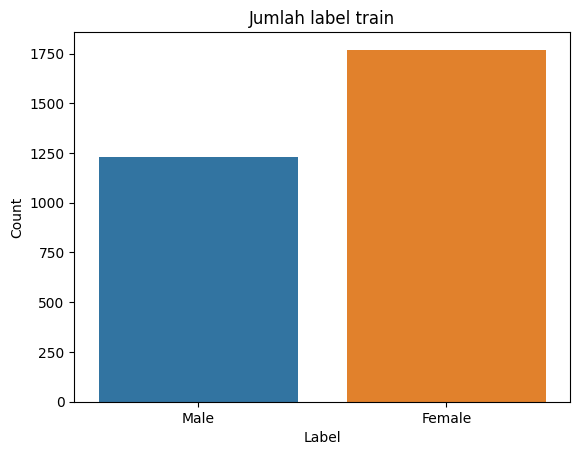

In [25]:
# Menyiapkan data untuk plot
data = {'Label': ['Male', 'Female'],
        'Count': [count_1_1, count_1_0]}

# Membuat DataFrame dari data
df_plot = pd.DataFrame(data)

# Membuat plot menggunakan Seaborn
sns.barplot(x='Label', y='Count', data=df_plot)

# Menambahkan judul plot
plt.title('Jumlah label train')

# Menampilkan plot
plt.show()

MENCOBA UNTUK MENGATASI IMBALANCE PADA DATA TRAINING

*  -dengan merubah 538 row male di kolom set menjadi data training
*   -sehingga terjadi imbalance pada data test






In [26]:
# Mengidentifikasi indeks data yang memenuhi kondisi
indices_to_update = dfGenderFix[(dfGenderFix['Set'] == 0) & (dfGenderFix['Male'] == 1)].index[:538]

# Memperbarui nilai kolom 'Set' menjadi 1 untuk indeks yang diidentifikasi
dfGenderFix.loc[indices_to_update, 'Set'] = 1

# Menghitung jumlah nilai 1 di kolom 'Set' dan nilai 1 di kolom 'Male'
count_1_1 = len(dfGenderFix[(dfGenderFix['Set'] == 1) & (dfGenderFix['Male'] == 1)])

# Menghitung jumlah nilai 1 di kolom 'Set' dan nilai 0 di kolom 'Male'
count_1_0 = len(dfGenderFix[(dfGenderFix['Set'] == 1) & (dfGenderFix['Male'] == 0)])

print("Jumlah nilai 1 di kolom 'Set' dan nilai 1 di kolom 'Male':", count_1_1)
print("Jumlah nilai 1 di kolom 'Set' dan nilai 0 di kolom 'Male':", count_1_0)

Jumlah nilai 1 di kolom 'Set' dan nilai 1 di kolom 'Male': 1769
Jumlah nilai 1 di kolom 'Set' dan nilai 0 di kolom 'Male': 1769


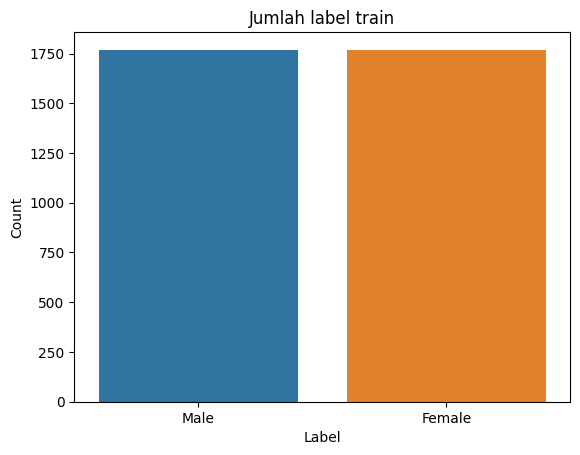

In [27]:
# Menyiapkan data untuk plot
data = {'Label': ['Male', 'Female'],
        'Count': [count_1_1, count_1_0]}

# Membuat DataFrame dari data
df_plot = pd.DataFrame(data)

# Membuat plot menggunakan Seaborn
sns.barplot(x='Label', y='Count', data=df_plot)

# Menambahkan judul plot
plt.title('Jumlah label train')

# Menampilkan plot
plt.show()

In [28]:
# Menghitung jumlah nilai 1 di kolom 'Set' dan nilai 1 di kolom 'Male'
count_0_1 = len(dfGenderFix[(dfGenderFix['Set'] == 0) & (dfGenderFix['Male'] == 1)])

# Menghitung jumlah nilai 1 di kolom 'Set' dan nilai 0 di kolom 'Male'
count_0_0 = len(dfGenderFix[(dfGenderFix['Set'] == 0) & (dfGenderFix['Male'] == 0)])

print("Jumlah nilai 0 di kolom 'Set' dan nilai 1 di kolom 'Male':", count_0_1)
print("Jumlah nilai 0 di kolom 'Set' dan nilai 0 di kolom 'Male':", count_0_0)

Jumlah nilai 0 di kolom 'Set' dan nilai 1 di kolom 'Male': 278
Jumlah nilai 0 di kolom 'Set' dan nilai 0 di kolom 'Male': 1184


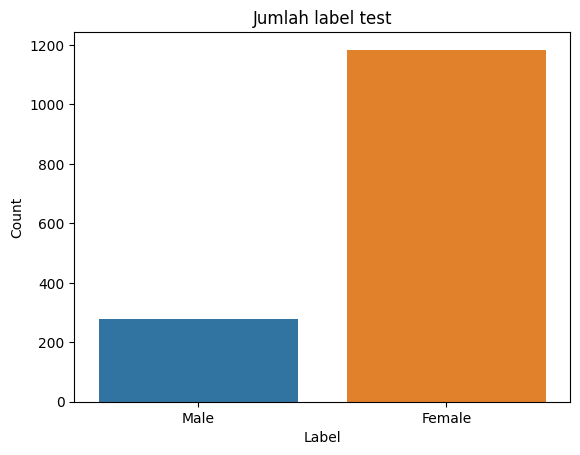

In [29]:
# Menyiapkan data untuk plot
data = {'Label': ['Male', 'Female'],
        'Count': [count_0_1, count_0_0]}

# Membuat DataFrame dari data
df_plot = pd.DataFrame(data)

# Membuat plot menggunakan Seaborn
sns.barplot(x='Label', y='Count', data=df_plot)

# Menambahkan judul plot
plt.title('Jumlah label test')

# Menampilkan plot
plt.show()

In [30]:
dfGenderFix

,imageId,Male,Set
0,000051.jpg,1,1
1,000052.jpg,1,1
2,000065.jpg,1,1
3,000166.jpg,1,1
4,000198.jpg,0,1
...,...,...,...
4995,202320.jpg,0,0
4996,202340.jpg,0,0
4997,202347.jpg,0,1
4998,202357.jpg,0,0


MENYALIN DATA YANG ADA DIFOLDER IMAGES , KE FOLDER TRAIN DAN TEST ,DIMANA MASING" FOLDER MEMILIKI FOLDER MALE DAN FEMALE

In [31]:
# Path ke folder Images
images_folder = 'sample_data/Images'

# Path ke folder train dan test
train_folder = 'sample_data/train'
test_folder = 'sample_data/test'

# Buat folder train dan test jika belum ada
os.makedirs(train_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Buat folder male dan female di dalam folder train dan test
train_male_folder = os.path.join(train_folder, 'male')
train_female_folder = os.path.join(train_folder, 'female')
os.makedirs(train_male_folder, exist_ok=True)
os.makedirs(train_female_folder, exist_ok=True)

test_male_folder = os.path.join(test_folder, 'male')
test_female_folder = os.path.join(test_folder, 'female')
os.makedirs(test_male_folder, exist_ok=True)
os.makedirs(test_female_folder, exist_ok=True)

# Salin gambar ke folder yang sesuai berdasarkan nilai kolom Male dan Set
for index, row in dfGenderFix.iterrows():
    image_id = row['imageId']
    male = row['Male']
    set_value = row['Set']

    source_path = os.path.join(images_folder, image_id)
    if male == 1:
        if set_value == 1:
            destination_folder = train_male_folder
        else:
            destination_folder = test_male_folder
    else:
        if set_value == 1:
            destination_folder = train_female_folder
        else:
            destination_folder = test_female_folder

    destination_path = os.path.join(destination_folder, image_id)
    shutil.copyfile(source_path, destination_path)


**MODELLING**

1.   VGG
2.   VGG pre-trained
3.   RESNET
4.   RESNET pre-trained
5.   GOOGLENET
6.   GOOGLENET pre-trained







1.VGG pre-trained

In [ ]:
# Define the training parameters
batch_size = 128
learning_rate = 0.001
epochs = 10

# Define the transformation
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomRotation(45),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Define the validation transformation
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the training dataset
train_dataset = datasets.ImageFolder('sample_data/train', transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Load the validation dataset
val_dataset = datasets.ImageFolder('sample_data/test', transform=val_transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the model architecture
modelvgg = models.vgg16(pretrained=False)
num_features = modelvgg.classifier[6].in_features
modelvgg.classifier[6] = nn.Linear(num_features, 2)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelvgg = modelvgg.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelvgg.parameters(), lr=learning_rate)

# Lists to store the training and validation losses per epoch
train_losses = []
val_losses = []

# Lists to store the training and validation accuracies per epoch
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    modelvgg.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = modelvgg(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        train_losses.append(loss.item())

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (i+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss / 10:.4f}")
            running_loss = 0.0

    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)

    # Validation phase
    modelvgg.eval()
    correct = 0
    total = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = modelvgg(inputs)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            val_losses.append(loss.item())

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {running_loss / len(train_loader):.4f}, Val Loss: {val_running_loss / len(val_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%")

print('Finished Training')

# Plot training and validation losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


'\n# Define the training parameters\nbatch_size = 128\nlearning_rate = 0.001\nepochs = 10\n\n# Define the transformation\ntrain_transform = transforms.Compose([\n    transforms.Resize(256),\n    transforms.RandomResizedCrop(224),\n    transforms.RandomRotation(45),\n    transforms.RandomHorizontalFlip(),\n    transforms.ToTensor(),\n    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])\n])\n\n# Define the validation transformation\nval_transform = transforms.Compose([\n    transforms.Resize(256),\n    transforms.CenterCrop(224),\n    transforms.ToTensor(),\n    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])\n])\n\n# Load the training dataset\ntrain_dataset = datasets.ImageFolder(\'sample_data/train\', transform=train_transform)\ntrain_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)\n\n# Load the validation dataset\nval_dataset = datasets.ImageFolder(\'sample_data/test\', transform=val_transform)\nval_loader = DataLoader(val_d

In [ ]:

def plot_confusion_matrix(confusion_matrix):
    """
    Plots a confusion matrix.

    Args:
        confusion_matrix (numpy.ndarray): The confusion matrix.
    """

    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap="Blues")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_xticks(np.arange(len(confusion_matrix)))
    ax.set_yticks(np.arange(len(confusion_matrix)))
    ax.set_title("Confusion matrix")
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix)):
            ax.text(j, i, confusion_matrix[i, j], color="black", size=10)
    fig.tight_layout()
    plt.show()


if __name__ == "__main__":
    # Compute and print the confusion matrix
    modelvgg.eval()
    predicted_labels = []
    true_labels = []

    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = modelvgg(inputs)
            _, predicted = torch.max(outputs.data, 1)

            predicted_labels.extend(predicted.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    confusion_mtx = confusion_matrix(true_labels, predicted_labels)

    # Plot the confusion matrix
    plot_confusion_matrix(confusion_mtx)

'\ndef plot_confusion_matrix(confusion_matrix):\n    """\n    Plots a confusion matrix.\n\n    Args:\n        confusion_matrix (numpy.ndarray): The confusion matrix.\n    """\n\n    fig, ax = plt.subplots()\n    im = ax.imshow(confusion_matrix, cmap="Blues")\n    ax.set_xlabel("Predicted label")\n    ax.set_ylabel("True label")\n    ax.set_xticks(np.arange(len(confusion_matrix)))\n    ax.set_yticks(np.arange(len(confusion_matrix)))\n    ax.set_title("Confusion matrix")\n    for i in range(len(confusion_matrix)):\n        for j in range(len(confusion_matrix)):\n            ax.text(j, i, confusion_matrix[i, j], color="black", size=10)\n    fig.tight_layout()\n    plt.show()\n\n\nif __name__ == "__main__":\n    # Compute and print the confusion matrix\n    modelvgg.eval()\n    predicted_labels = []\n    true_labels = []\n\n    with torch.no_grad():\n        for data in val_loader:\n            inputs, labels = data\n            inputs, labels = inputs.to(device), labels.to(device)\n\n    

In [ ]:
# Path tujuan untuk menyimpan model
save_path = '/content/drive/MyDrive/model_vgg.pth'

# Simpan model
torch.save(modelvgg.state_dict(), save_path)

print('Model telah disimpan di:', save_path)

"\n# Path tujuan untuk menyimpan model\nsave_path = '/content/drive/MyDrive/model_vgg.pth'\n\n# Simpan model\ntorch.save(modelvgg.state_dict(), save_path)\n\nprint('Model telah disimpan di:', save_path)\n"

2.VGG pre-trained

In [ ]:
# Define the training parameters
batch_size = 128
learning_rate = 0.001
epochs = 10

# Define the transformation
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomRotation(45),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Define the validation transformation
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the training dataset
train_dataset = datasets.ImageFolder('sample_data/train', transform=train_transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Load the validation dataset
val_dataset = datasets.ImageFolder('sample_data/test', transform=val_transform)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the model architecture
modelvggweight = models.vgg16(pretrained=True)  # Use pretrained weights
num_features = modelvggweight.classifier[6].in_features
modelvggweight.classifier[6] = nn.Linear(num_features, 2)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelvggweight = modelvggweight.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelvggweight.parameters(), lr=learning_rate)

# Lists to store the training and validation losses per epoch
train_losses = []
val_losses = []

# Lists to store the training and validation accuracies per epoch
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    # Training phase
    modelvggweight.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = modelvggweight(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        train_losses.append(loss.item())

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (i+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss / 10:.4f}")
            running_loss = 0.0

    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)

    # Validation phase
    modelvggweight.eval()
    correct = 0
    total = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = modelvggweight(inputs)
            _, predicted = torch.max(outputs.data, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            val_losses.append(loss.item())

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {running_loss / len(train_loader):.4f}, Val Loss: {val_running_loss / len(val_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%")

print('Finished Training')

# Plot training and validation losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


'\n# Define the training parameters\nbatch_size = 128\nlearning_rate = 0.001\nepochs = 10\n\n# Define the transformation\ntrain_transform = transforms.Compose([\n    transforms.Resize(256),\n    transforms.RandomResizedCrop(224),\n    transforms.RandomRotation(45),\n    transforms.RandomHorizontalFlip(),\n    transforms.ToTensor(),\n    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])\n])\n\n# Define the validation transformation\nval_transform = transforms.Compose([\n    transforms.Resize(256),\n    transforms.CenterCrop(224),\n    transforms.ToTensor(),\n    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])\n])\n\n# Load the training dataset\ntrain_dataset = datasets.ImageFolder(\'sample_data/train\', transform=train_transform)\ntrain_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)\n\n# Load the validation dataset\nval_dataset = datasets.ImageFolder(\'sample_data/test\', transform=val_transform)\nval_loader =

In [ ]:

def plot_confusion_matrix(confusion_matrix):
    """
    Plots a confusion matrix.

    Args:
        confusion_matrix (numpy.ndarray): The confusion matrix.
    """

    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap="Blues")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_xticks(np.arange(len(confusion_matrix)))
    ax.set_yticks(np.arange(len(confusion_matrix)))
    ax.set_title("Confusion matrix")
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix)):
            ax.text(j, i, confusion_matrix[i, j], color="black", size=10)
    fig.tight_layout()
    plt.show()

# Compute and print the confusion matrix
modelvggweight.eval()
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = modelvggweight(inputs)
        _, predicted = torch.max(outputs.data, 1)

        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx)


'\ndef plot_confusion_matrix(confusion_matrix):\n    """\n    Plots a confusion matrix.\n\n    Args:\n        confusion_matrix (numpy.ndarray): The confusion matrix.\n    """\n\n    fig, ax = plt.subplots()\n    im = ax.imshow(confusion_matrix, cmap="Blues")\n    ax.set_xlabel("Predicted label")\n    ax.set_ylabel("True label")\n    ax.set_xticks(np.arange(len(confusion_matrix)))\n    ax.set_yticks(np.arange(len(confusion_matrix)))\n    ax.set_title("Confusion matrix")\n    for i in range(len(confusion_matrix)):\n        for j in range(len(confusion_matrix)):\n            ax.text(j, i, confusion_matrix[i, j], color="black", size=10)\n    fig.tight_layout()\n    plt.show()\n\n# Compute and print the confusion matrix\nmodelvggweight.eval()\npredicted_labels = []\ntrue_labels = []\n\nwith torch.no_grad():\n    for data in val_loader:\n        inputs, labels = data\n        inputs, labels = inputs.to(device), labels.to(device)\n\n        outputs = modelvggweight(inputs)\n        _, predict

In [ ]:

# Path tujuan untuk menyimpan model
save_path = '/content/drive/MyDrive/model_vggweight.pth'

# Simpan model
torch.save(modelvggweight.state_dict(), save_path)

print('Model telah disimpan di:', save_path)


"\n# Path tujuan untuk menyimpan model\nsave_path = '/content/drive/MyDrive/model_vggweight.pth'\n\n# Simpan model\ntorch.save(modelvggweight.state_dict(), save_path)\n\nprint('Model telah disimpan di:', save_path)\n"

3.RESNET

In [ ]:
# Define the training parameters
batch_size = 128
learning_rate = 0.001
epochs = 10

# Define the transformation
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Define the validation transformation
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the training dataset
train_dataset = datasets.ImageFolder('sample_data/train', transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Load the validation dataset
val_dataset = datasets.ImageFolder('sample_data/test', transform=val_transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the model architecture
modelresnetweight = models.resnet18(pretrained=False)
num_features = modelresnetweight.fc.in_features
modelresnetweight.fc = nn.Linear(num_features, 2)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelresnetweight = modelresnetweight.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelresnetweight.parameters(), lr=learning_rate)

# Lists to store the training and validation losses per epoch
train_losses = []
val_losses = []

# Lists to store the training and validation accuracies per epoch
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    modelresnetweight.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = modelresnetweight(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        train_losses.append(loss.item())

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (i+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss / 10:.4f}")
            running_loss = 0.0

    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)

    # Validation phase
    modelresnetweight.eval()
    correct = 0
    total = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = modelresnetweight(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            val_losses.append(loss.item())

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {running_loss / len(train_loader):.4f}, Val Loss: {val_running_loss / len(val_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%")

print('Finished Training')

# Plot training and validation losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

'\n# Define the training parameters\nbatch_size = 128\nlearning_rate = 0.001\nepochs = 10\n\n# Define the transformation\ntrain_transform = transforms.Compose([\n    transforms.Resize(256),\n    transforms.RandomResizedCrop(224),\n    transforms.RandomHorizontalFlip(),\n    transforms.ToTensor(),\n    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])\n])\n\n# Define the validation transformation\nval_transform = transforms.Compose([\n    transforms.Resize(256),\n    transforms.CenterCrop(224),\n    transforms.ToTensor(),\n    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])\n])\n\n# Load the training dataset\ntrain_dataset = datasets.ImageFolder(\'sample_data/train\', transform=train_transform)\ntrain_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)\n\n# Load the validation dataset\nval_dataset = datasets.ImageFolder(\'sample_data/test\', transform=val_transform)\nval_loader = DataLoader(val_dataset, batch_size=batch_size, shuff

In [ ]:
def plot_confusion_matrix(confusion_matrix):
    """
    Plots a confusion matrix.

    Args:
        confusion_matrix (numpy.ndarray): The confusion matrix.
    """

    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap="Blues")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_xticks(np.arange(len(confusion_matrix)))
    ax.set_yticks(np.arange(len(confusion_matrix)))
    ax.set_title("Confusion matrix")
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix)):
            ax.text(j, i, confusion_matrix[i, j], color="black", size=10)
    fig.tight_layout()
    plt.show()

# Compute and print the confusion matrix
modelresnetweight.eval()
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = modelresnetweight(inputs)
        _, predicted = torch.max(outputs.data, 1)

        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx)

'\ndef plot_confusion_matrix(confusion_matrix):\n    """\n    Plots a confusion matrix.\n\n    Args:\n        confusion_matrix (numpy.ndarray): The confusion matrix.\n    """\n\n    fig, ax = plt.subplots()\n    im = ax.imshow(confusion_matrix, cmap="Blues")\n    ax.set_xlabel("Predicted label")\n    ax.set_ylabel("True label")\n    ax.set_xticks(np.arange(len(confusion_matrix)))\n    ax.set_yticks(np.arange(len(confusion_matrix)))\n    ax.set_title("Confusion matrix")\n    for i in range(len(confusion_matrix)):\n        for j in range(len(confusion_matrix)):\n            ax.text(j, i, confusion_matrix[i, j], color="black", size=10)\n    fig.tight_layout()\n    plt.show()\n\n# Compute and print the confusion matrix\nmodelresnetweight.eval()\npredicted_labels = []\ntrue_labels = []\n\nwith torch.no_grad():\n    for data in val_loader:\n        inputs, labels = data\n        inputs, labels = inputs.to(device), labels.to(device)\n\n        outputs = modelresnetweight(inputs)\n        _, p

In [ ]:

# Path tujuan untuk menyimpan model
save_path = '/content/drive/MyDrive/modelresnet.pth'

# Simpan model
torch.save(modelresnetweight.state_dict(), save_path)

print('Model telah disimpan di:', save_path)


"\n# Path tujuan untuk menyimpan model\nsave_path = '/content/drive/MyDrive/modelresnet.pth'\n\n# Simpan model\ntorch.save(modelresnetweight.state_dict(), save_path)\n\nprint('Model telah disimpan di:', save_path)\n"

4.RESNET pre-trained

In [ ]:

# Define the training parameters
batch_size = 128
learning_rate = 0.001
epochs = 10

# Define the transformation
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Define the validation transformation
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the training dataset
train_dataset = datasets.ImageFolder('sample_data/train', transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Load the validation dataset
val_dataset = datasets.ImageFolder('sample_data/test', transform=val_transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the model architecture
modelresnetweight = models.resnet18(pretrained=True)
num_features = modelresnetweight.fc.in_features
modelresnetweight.fc = nn.Linear(num_features, 2)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelresnetweight = modelresnetweight.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(modelresnetweight.parameters(), lr=learning_rate)

# Lists to store the training and validation losses per epoch
train_losses = []
val_losses = []

# Lists to store the training and validation accuracies per epoch
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    modelresnetweight.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = modelresnetweight(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        train_losses.append(loss.item())

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (i+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss / 10:.4f}")
            running_loss = 0.0

    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)

    # Validation phase
    modelresnetweight.eval()
    correct = 0
    total = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = modelresnetweight(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            val_losses.append(loss.item())

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {running_loss / len(train_loader):.4f}, Val Loss: {val_running_loss / len(val_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%")

print('Finished Training')

# Plot training and validation losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


'\n# Define the training parameters\nbatch_size = 128\nlearning_rate = 0.001\nepochs = 10\n\n# Define the transformation\ntrain_transform = transforms.Compose([\n    transforms.Resize(256),\n    transforms.RandomResizedCrop(224),\n    transforms.RandomHorizontalFlip(),\n    transforms.ToTensor(),\n    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])\n])\n\n# Define the validation transformation\nval_transform = transforms.Compose([\n    transforms.Resize(256),\n    transforms.CenterCrop(224),\n    transforms.ToTensor(),\n    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])\n])\n\n# Load the training dataset\ntrain_dataset = datasets.ImageFolder(\'sample_data/train\', transform=train_transform)\ntrain_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)\n\n# Load the validation dataset\nval_dataset = datasets.ImageFolder(\'sample_data/test\', transform=val_transform)\nval_loader = DataLoader(val_dataset, batch_size=batch_size, shuff

In [ ]:

def plot_confusion_matrix(confusion_matrix):
    """
    Plots a confusion matrix.

    Args:
        confusion_matrix (numpy.ndarray): The confusion matrix.
    """

    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap="Blues")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_xticks(np.arange(len(confusion_matrix)))
    ax.set_yticks(np.arange(len(confusion_matrix)))
    ax.set_title("Confusion matrix")
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix)):
            ax.text(j, i, confusion_matrix[i, j], color="black", size=10)
    fig.tight_layout()
    plt.show()

# Compute and print the confusion matrix
modelresnetweight.eval()
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = modelresnetweight(inputs)
        _, predicted = torch.max(outputs.data, 1)

        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx)


'\ndef plot_confusion_matrix(confusion_matrix):\n    """\n    Plots a confusion matrix.\n\n    Args:\n        confusion_matrix (numpy.ndarray): The confusion matrix.\n    """\n\n    fig, ax = plt.subplots()\n    im = ax.imshow(confusion_matrix, cmap="Blues")\n    ax.set_xlabel("Predicted label")\n    ax.set_ylabel("True label")\n    ax.set_xticks(np.arange(len(confusion_matrix)))\n    ax.set_yticks(np.arange(len(confusion_matrix)))\n    ax.set_title("Confusion matrix")\n    for i in range(len(confusion_matrix)):\n        for j in range(len(confusion_matrix)):\n            ax.text(j, i, confusion_matrix[i, j], color="black", size=10)\n    fig.tight_layout()\n    plt.show()\n\n# Compute and print the confusion matrix\nmodelresnetweight.eval()\npredicted_labels = []\ntrue_labels = []\n\nwith torch.no_grad():\n    for data in val_loader:\n        inputs, labels = data\n        inputs, labels = inputs.to(device), labels.to(device)\n\n        outputs = modelresnetweight(inputs)\n        _, p

In [ ]:

# Path tujuan untuk menyimpan model
save_path = '/content/drive/MyDrive/modelresnetweight.pth'

# Simpan model
torch.save(modelresnetweight.state_dict(), save_path)

print('Model telah disimpan di:', save_path)


"\n# Path tujuan untuk menyimpan model\nsave_path = '/content/drive/MyDrive/modelresnetweight.pth'\n\n# Simpan model\ntorch.save(modelresnetweight.state_dict(), save_path)\n\nprint('Model telah disimpan di:', save_path)\n"

5.GOOGLENET

Epoch [1/10], Step [10/28], Loss: 0.8261
Epoch [1/10], Step [20/28], Loss: 0.6797
Epoch [1/10], Train Loss: 0.1919, Val Loss: 0.9478, Train Accuracy: 55.54%, Val Accuracy: 19.02%
Epoch [2/10], Step [10/28], Loss: 0.6567
Epoch [2/10], Step [20/28], Loss: 0.6148
Epoch [2/10], Train Loss: 0.1788, Val Loss: 0.6001, Train Accuracy: 63.65%, Val Accuracy: 73.19%
Epoch [3/10], Step [10/28], Loss: 0.6536
Epoch [3/10], Step [20/28], Loss: 0.6297
Epoch [3/10], Train Loss: 0.1791, Val Loss: 0.4936, Train Accuracy: 64.08%, Val Accuracy: 80.51%
Epoch [4/10], Step [10/28], Loss: 0.5900
Epoch [4/10], Step [20/28], Loss: 0.5900
Epoch [4/10], Train Loss: 0.1692, Val Loss: 0.5680, Train Accuracy: 68.74%, Val Accuracy: 69.70%
Epoch [5/10], Step [10/28], Loss: 0.5641
Epoch [5/10], Step [20/28], Loss: 0.5185
Epoch [5/10], Train Loss: 0.1420, Val Loss: 0.4655, Train Accuracy: 72.89%, Val Accuracy: 76.47%
Epoch [6/10], Step [10/28], Loss: 0.5027
Epoch [6/10], Step [20/28], Loss: 0.4885
Epoch [6/10], Train Los

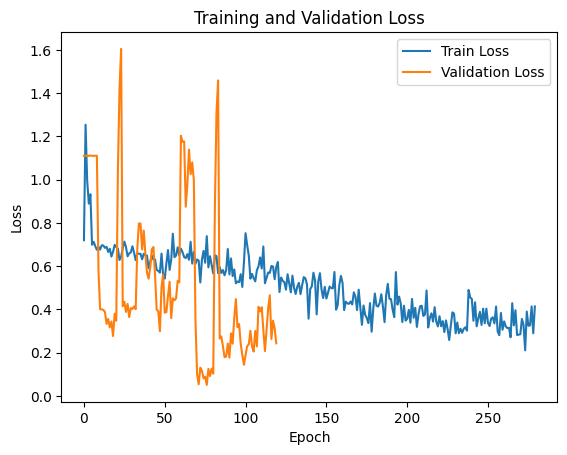

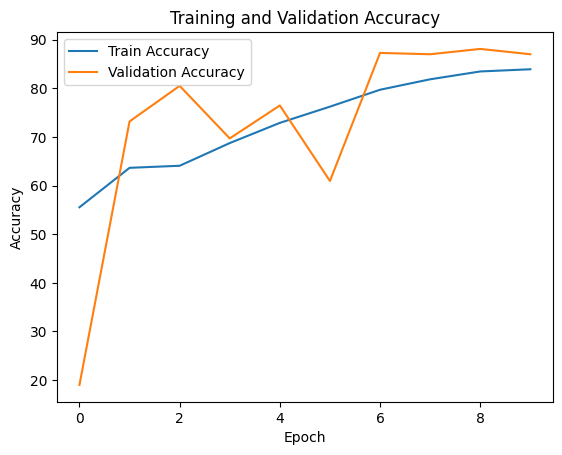

In [ ]:
# Define the training parameters
batch_size = 128
learning_rate = 0.001
epochs = 10

# Define the transformation
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Define the validation transformation
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Define the path to the training and validation datasets
train_dataset_path = 'sample_data/train'  # Ganti dengan path dataset training Anda
val_dataset_path = 'sample_data/test'  # Ganti dengan path dataset validasi Anda

# Load the training dataset
train_dataset = datasets.ImageFolder(train_dataset_path, transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Load the validation dataset
val_dataset = datasets.ImageFolder(val_dataset_path, transform=val_transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the model architecture
model = models.googlenet(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)  # Mengganti output layer menjadi 2 untuk label 'Male' dan 'Female'

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Lists to store the training and validation losses per epoch
train_losses = []
val_losses = []

# Lists to store the training and validation accuracies per epoch
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    model.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # ...
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()
        # ...




        running_loss += loss.item()
        train_losses.append(loss.item())

        # ...
        _, predicted = torch.max(outputs.logits, 1)
        # ...

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (i+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss / 10:.4f}")
            running_loss = 0.0

    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)

    # Validation phase
    model.eval()
    correct = 0
    total = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            val_losses.append(loss.item())

            # ...
            _, predicted = torch.max(outputs, 1)
            # ...

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {running_loss / len(train_loader):.4f}, Val Loss: {val_running_loss / len(val_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%")

print('Finished Training')

# Plot training and validation losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


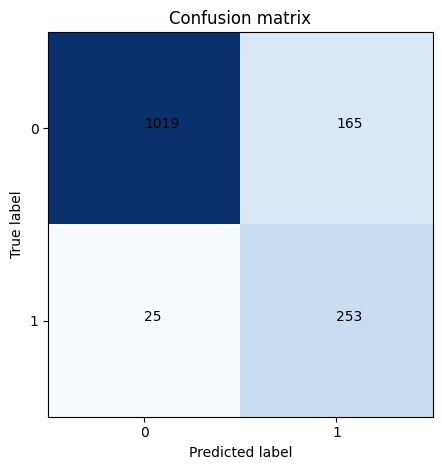

In [ ]:
def plot_confusion_matrix(confusion_matrix):
    """
    Plots a confusion matrix.

    Args:
        confusion_matrix (numpy.ndarray): The confusion matrix.
    """

    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap="Blues")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_xticks(np.arange(len(confusion_matrix)))
    ax.set_yticks(np.arange(len(confusion_matrix)))
    ax.set_title("Confusion matrix")
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix)):
            ax.text(j, i, confusion_matrix[i, j], color="black", size=10)
    fig.tight_layout()
    plt.show()

# Compute and print the confusion matrix
model.eval()
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)

        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx)

In [ ]:
# Path tujuan untuk menyimpan model
save_path = '/content/drive/MyDrive/model_googlenet.pth'

# Simpan model
torch.save(model.state_dict(), save_path)

print('Model telah disimpan di:', save_path)


Model telah disimpan di: /content/drive/MyDrive/model_googlenet.pth


6.GOOGLENET pre-trained

In [ ]:
# Define the training parameters
batch_size = 128
learning_rate = 0.001
epochs = 10

# Define the transformation
train_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomResizedCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Define the validation transformation
val_transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Load the training dataset
train_dataset = datasets.ImageFolder('sample_data/train', transform=train_transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# Load the validation dataset
val_dataset = datasets.ImageFolder('sample_data/test', transform=val_transform)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define the model architecture
model_googlenet = models.googlenet(pretrained=True)
num_features = model_googlenet.fc.in_features
model_googlenet.fc = nn.Linear(num_features, 2)

# Move the model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_googlenet = model_googlenet.to(device)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_googlenet.parameters(), lr=learning_rate)

# Lists to store the training and validation losses per epoch
train_losses = []
val_losses = []

# Lists to store the training and validation accuracies per epoch
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(epochs):
    running_loss = 0.0
    correct = 0
    total = 0

    model_googlenet.train()
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model_googlenet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        train_losses.append(loss.item())

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        if (i+1) % 10 == 0:
            print(f"Epoch [{epoch+1}/{epochs}], Step [{i+1}/{len(train_loader)}], Loss: {running_loss / 10:.4f}")
            running_loss = 0.0

    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)

    # Validation phase
    model_googlenet.eval()
    correct = 0
    total = 0
    val_running_loss = 0.0

    with torch.no_grad():
        for data in val_loader:
            inputs, labels = data
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model_googlenet(inputs)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
            val_losses.append(loss.item())

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)

    print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {running_loss / len(train_loader):.4f}, Val Loss: {val_running_loss / len(val_loader):.4f}, Train Accuracy: {train_accuracy:.2f}%, Val Accuracy: {val_accuracy:.2f}%")

print('Finished Training')

# Plot training and validation losses
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot training and validation accuracies
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
def plot_confusion_matrix(confusion_matrix):
    """
    Plots a confusion matrix.

    Args:
        confusion_matrix (numpy.ndarray): The confusion matrix.
    """

    fig, ax = plt.subplots()
    im = ax.imshow(confusion_matrix, cmap="Blues")
    ax.set_xlabel("Predicted label")
    ax.set_ylabel("True label")
    ax.set_xticks(np.arange(len(confusion_matrix)))
    ax.set_yticks(np.arange(len(confusion_matrix)))
    ax.set_title("Confusion matrix")
    for i in range(len(confusion_matrix)):
        for j in range(len(confusion_matrix)):
            ax.text(j, i, confusion_matrix[i, j], color="black", size=10)
    fig.tight_layout()
    plt.show()

# Compute and print the confusion matrix
model_googlenet.eval()
predicted_labels = []
true_labels = []

with torch.no_grad():
    for data in val_loader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model_googlenet(inputs)
        _, predicted = torch.max(outputs.data, 1)

        predicted_labels.extend(predicted.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

confusion_mtx = confusion_matrix(true_labels, predicted_labels)

# Plot the confusion matrix
plot_confusion_matrix(confusion_mtx)

In [ ]:
# Path tujuan untuk menyimpan model
save_path = '/content/drive/MyDrive/model_googlenetweight.pth'

# Simpan model
torch.save(model_googlenet.state_dict(), save_path)

print('Model telah disimpan di:', save_path)